# 1. Import SQL, NumPy, pandas, Matplotlib for Python

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

* Connect to the database file `movies.db` and use the file path `data/`.

In [2]:
conn = sqlite3.connect('data\movies.db')

# 2. Open the database file as a dataframe called `query`.

In addition, you will `JOIN` tables and `SELECT` all the rows below to get the information you need.

Since this is a `db` file, you will need to use `pd.read_sql` and input the SQL code to get the output below.

In [3]:
#Print the query dataframe and filter the rows needed
query = pd.read_sql('''SELECT DISTINCT tconst, g.title, i.genres, g.studio,  g.year,
                       t.production_budget, t.worldwide_gross
                       FROM bom_movie_gross as g
                       JOIN imdb_title_basics as i
                       ON g.title = i.primary_title
                       AND g.year = i.start_year
                       JOIN tn_movie_budgets as t
                       ON t.movie = i.primary_title''', conn)
query.head()

,tconst,title,genres,studio,year,production_budget,worldwide_gross
0,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",BV,2010,"$200,000,000","$1,068,879,522"
1,tt1375666,Inception,"Action,Adventure,Sci-Fi",WB,2010,"$160,000,000","$835,524,642"
2,tt0892791,Shrek Forever After,"Adventure,Animation,Comedy",P/DW,2010,"$165,000,000","$756,244,673"
3,tt1325004,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",Sum.,2010,"$68,000,000","$706,102,828"
4,tt1228705,Iron Man 2,"Action,Adventure,Sci-Fi",Par.,2010,"$170,000,000","$621,156,389"


I've joined the `bom_movie_gross` table and the `imdb_title_basics` table to get the data I need for Microsoft. All columns selected are `DISTINCT` so we receive different values for each movie. In addition, we used the `ON` clause to `JOIN` multiple columns. First, we connected the tables based on movie title - `g.title = i.primary_title`. Then we connected the tables based on year - `g.year = i.start_year` - because we only need movies under the `title` column listed once. Otherwise, we would have "Frozen" listed three times.

I've also joined the `tn_movie_budgets` table with the `imdb_basiccs_title` table based on movie title - `t.movie = i.primary_title`. This will allow us to add `production_budget` and `worldwide_gross` columns in the next steps.

# 3. Convert `production_budget` and `worldwide_gross` columns to floats in the dataframe.

First, we need to remove the commas ( , ) and the $ from the dataframe.

In [4]:
#Eliminate all $ and commas from the columns
query['production_budget'] = query['production_budget'].map(lambda x: x.replace(',', ''))
query['production_budget'] = query['production_budget'].map(lambda x: x.replace('$', ''))
query['worldwide_gross'] = query['worldwide_gross'].map(lambda x: x.replace(',', ''))
query['worldwide_gross'] = query['worldwide_gross'].map(lambda x: x.replace('$', ''))

In [5]:
query

,tconst,title,genres,studio,year,production_budget,worldwide_gross
0,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",BV,2010,200000000,1068879522
1,tt1375666,Inception,"Action,Adventure,Sci-Fi",WB,2010,160000000,835524642
2,tt0892791,Shrek Forever After,"Adventure,Animation,Comedy",P/DW,2010,165000000,756244673
3,tt1325004,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",Sum.,2010,68000000,706102828
4,tt1228705,Iron Man 2,"Action,Adventure,Sci-Fi",Par.,2010,170000000,621156389
...,...,...,...,...,...,...,...
1070,tt1034415,Suspiria,"Fantasy,Horror,Mystery",Amazon,2018,20000000,7034615
1071,tt5360952,The Hurricane Heist,"Action,Adventure,Crime",ENTMP,2018,40000000,30963684
1072,tt7137380,Destroyer,"Action,Crime,Drama",Annapurna,2018,9000000,3681096
1073,tt1801552,Gotti,"Biography,Crime,Drama",VE,2018,10000000,6089100


Next, the `production_budget` column and the `worldwide_gross` column will have to be converted from a string to a float. Check the dtypes for all columns and you'll see both columns are currently strings - `object`.

In [6]:
query.dtypes

tconst               object
title                object
genres               object
studio               object
year                  int64
production_budget    object
worldwide_gross      object
dtype: object

In [7]:
#Convert columns from strings to floats
query.production_budget = query.production_budget.astype(float)
query.worldwide_gross = query.worldwide_gross.astype(float)
query

,tconst,title,genres,studio,year,production_budget,worldwide_gross
0,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",BV,2010,200000000.0,1.068880e+09
1,tt1375666,Inception,"Action,Adventure,Sci-Fi",WB,2010,160000000.0,8.355246e+08
2,tt0892791,Shrek Forever After,"Adventure,Animation,Comedy",P/DW,2010,165000000.0,7.562447e+08
3,tt1325004,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",Sum.,2010,68000000.0,7.061028e+08
4,tt1228705,Iron Man 2,"Action,Adventure,Sci-Fi",Par.,2010,170000000.0,6.211564e+08
...,...,...,...,...,...,...,...
1070,tt1034415,Suspiria,"Fantasy,Horror,Mystery",Amazon,2018,20000000.0,7.034615e+06
1071,tt5360952,The Hurricane Heist,"Action,Adventure,Crime",ENTMP,2018,40000000.0,3.096368e+07
1072,tt7137380,Destroyer,"Action,Crime,Drama",Annapurna,2018,9000000.0,3.681096e+06
1073,tt1801552,Gotti,"Biography,Crime,Drama",VE,2018,10000000.0,6.089100e+06


Run the dtypes again and you'll see both columns are now floats - `float64`.

In [8]:
#Verify change
query.dtypes

tconst                object
title                 object
genres                object
studio                object
year                   int64
production_budget    float64
worldwide_gross      float64
dtype: object

# 4. Add a new column called `profit` to the dataframe.

**We'll use the newly created `profit` column as our primary metric for our data!**

In [9]:
#Add 'profit' column to the dataframe
query['profit'] = query['worldwide_gross'] - query['production_budget']
query

,tconst,title,genres,studio,year,production_budget,worldwide_gross,profit
0,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",BV,2010,200000000.0,1.068880e+09,868879522.0
1,tt1375666,Inception,"Action,Adventure,Sci-Fi",WB,2010,160000000.0,8.355246e+08,675524642.0
2,tt0892791,Shrek Forever After,"Adventure,Animation,Comedy",P/DW,2010,165000000.0,7.562447e+08,591244673.0
3,tt1325004,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",Sum.,2010,68000000.0,7.061028e+08,638102828.0
4,tt1228705,Iron Man 2,"Action,Adventure,Sci-Fi",Par.,2010,170000000.0,6.211564e+08,451156389.0
...,...,...,...,...,...,...,...,...
1070,tt1034415,Suspiria,"Fantasy,Horror,Mystery",Amazon,2018,20000000.0,7.034615e+06,-12965385.0
1071,tt5360952,The Hurricane Heist,"Action,Adventure,Crime",ENTMP,2018,40000000.0,3.096368e+07,-9036316.0
1072,tt7137380,Destroyer,"Action,Crime,Drama",Annapurna,2018,9000000.0,3.681096e+06,-5318904.0
1073,tt1801552,Gotti,"Biography,Crime,Drama",VE,2018,10000000.0,6.089100e+06,-3910900.0


# 5. Find the Top 10 Most Profitable Films using the `profit` column.

Sort the dataframe in descending order and then reduce the list down to the top 10 profitable films.

In [10]:
#Top 10 Profitable Films
query = query.sort_values('profit', ascending=False).iloc[:10]

In [11]:
query

,tconst,title,genres,studio,year,production_budget,worldwide_gross,profit
987,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,2018,300000000.0,2.048134e+09,1.748134e+09
643,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,2015,215000000.0,1.648855e+09,1.433855e+09
644,tt2820852,Furious 7,"Action,Crime,Thriller",Uni.,2015,190000000.0,1.518723e+09,1.328723e+09
988,tt1825683,Black Panther,"Action,Adventure,Sci-Fi",BV,2018,200000000.0,1.348258e+09,1.148258e+09
989,tt4881806,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,2018,170000000.0,1.305773e+09,1.135773e+09
407,tt2294629,Frozen,"Adventure,Animation,Comedy",BV,2013,150000000.0,1.272470e+09,1.122470e+09
646,tt2293640,Minions,"Adventure,Animation,Comedy",Uni.,2015,74000000.0,1.160336e+09,1.086336e+09
645,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,2015,330600000.0,1.403014e+09,1.072414e+09
990,tt3606756,Incredibles 2,"Action,Adventure,Animation",BV,2018,200000000.0,1.242521e+09,1.042521e+09
408,tt1300854,Iron Man 3,"Action,Adventure,Sci-Fi",BV,2013,200000000.0,1.215392e+09,1.015392e+09


# 6. Create a histogram chart showing the profits from the top 10 movies. Include the mean and median in the chart too.

I want to know the mean and median profit for the top 10 movies so we can decide which one is a better indicator on how much profit needs to be made in order for Microsoft's movie studio to be both profitable and a strong contender in the movie business against other movie studios.

In [12]:
query['profit'].describe()

count    1.000000e+01
mean     1.213388e+09
std      2.287180e+08
min      1.015392e+09
25%      1.075895e+09
50%      1.129121e+09
75%      1.283607e+09
max      1.748134e+09
Name: profit, dtype: float64

In [13]:
profit_mean = np.mean(query.profit)
profit_mean

1213387591.0

In [14]:
profit_median = np.median(query.profit)
profit_median

1129121354.5

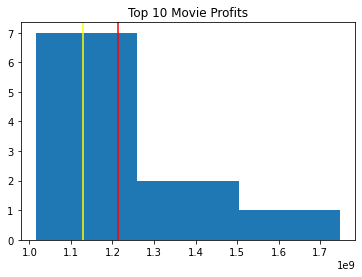

In [15]:
plt.hist(query.profit, bins=3)
plt.axvline(profit_mean, color='red')
plt.axvline(profit_median, color='yellow')
plt.title("Top 10 Movie Profits")
plt.show()

### The data is skewed to the right so the mean is greater than the median. This tells me they're a couple of large values affecting the data and that the median is the better measure on telling us how much profit needs to be made for a successful movie. In this case, the median amount is around $1.12 billion!

# 7. Sort the `query` database to display only the movie titles and their profits.

I want to use this information for a bar plot I'll create in the next step.

Sort the values to display only movie titles and their profits.

In [16]:
movie_profits = query.set_index('title')['profit'].sort_values(ascending=False)

In [17]:
movie_profits

title
Avengers: Infinity War            1.748134e+09
Jurassic World                    1.433855e+09
Furious 7                         1.328723e+09
Black Panther                     1.148258e+09
Jurassic World: Fallen Kingdom    1.135773e+09
Frozen                            1.122470e+09
Minions                           1.086336e+09
Avengers: Age of Ultron           1.072414e+09
Incredibles 2                     1.042521e+09
Iron Man 3                        1.015392e+09
Name: profit, dtype: float64

# 8. Generate a bar plot

In the cell below, create a sorted bar chart displaying the Top 10 Films with the highest `profit`.

Use `fig` and `ax` as your variables.

Your chart should have the following:
1. A figsize set to `(15,8)`
2. A title set to `Top 10 Worldwide Profitable Movies`
3. A ylabel set to `Total Profit (in billions $)`
4. An xlabel set to `Movies`

In [18]:
movie_profits.index

Index(['Avengers: Infinity War', 'Jurassic World', 'Furious 7',
       'Black Panther', 'Jurassic World: Fallen Kingdom', 'Frozen', 'Minions',
       'Avengers: Age of Ultron', 'Incredibles 2', 'Iron Man 3'],
      dtype='object', name='title')

In [19]:
movie_profits.values

array([1.74813420e+09, 1.43385486e+09, 1.32872279e+09, 1.14825822e+09,
       1.13577280e+09, 1.12246991e+09, 1.08633617e+09, 1.07241396e+09,
       1.04252071e+09, 1.01539227e+09])

<ipython-input-20-30e8a7f3da02>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x.str.replace(' ', '\n'))


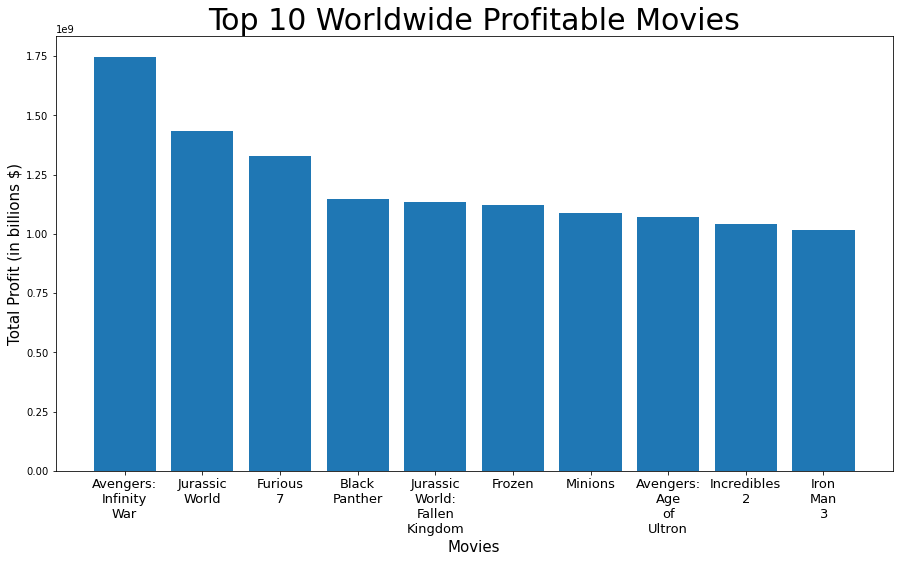

In [20]:
#Create bar chart showing Top 10 Worldwide Profitable Movies
x = movie_profits.index
y = movie_profits.values

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x,y)

ax.set_title('Top 10 Worldwide Profitable Movies', fontsize=30)
ax.set_xlabel('Movies', fontsize=15)
ax.set_ylabel('Total Profit (in billions $)', fontsize=15)

ax.set_xticklabels(x.str.replace(' ', '\n'))
ax.tick_params(axis='x', labelsize=13)

### The data above lets us know which movies brought in the highest profits around the globe.

# 9. Group and Count the number of studios within the Top 10 Most Profitable Movies data.

If we know which movie studios made the top 10 profitable movies, we can look further into how successful each movie studio is in terms of profits. The first thing I want to do is find out which studios released the top 10 profitable movies.

In [21]:
query

,tconst,title,genres,studio,year,production_budget,worldwide_gross,profit
987,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,2018,300000000.0,2.048134e+09,1.748134e+09
643,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,2015,215000000.0,1.648855e+09,1.433855e+09
644,tt2820852,Furious 7,"Action,Crime,Thriller",Uni.,2015,190000000.0,1.518723e+09,1.328723e+09
988,tt1825683,Black Panther,"Action,Adventure,Sci-Fi",BV,2018,200000000.0,1.348258e+09,1.148258e+09
989,tt4881806,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,2018,170000000.0,1.305773e+09,1.135773e+09
407,tt2294629,Frozen,"Adventure,Animation,Comedy",BV,2013,150000000.0,1.272470e+09,1.122470e+09
646,tt2293640,Minions,"Adventure,Animation,Comedy",Uni.,2015,74000000.0,1.160336e+09,1.086336e+09
645,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,2015,330600000.0,1.403014e+09,1.072414e+09
990,tt3606756,Incredibles 2,"Action,Adventure,Animation",BV,2018,200000000.0,1.242521e+09,1.042521e+09
408,tt1300854,Iron Man 3,"Action,Adventure,Sci-Fi",BV,2013,200000000.0,1.215392e+09,1.015392e+09


In [22]:
#Group and Count the movie studios in the dataframe above
studio_count = query.groupby('studio')['profit'].count()
studio_count

studio
BV      6
Uni.    4
Name: profit, dtype: int64

# 10. Generate a bar plot.

In the cell below, create a bar chart displaying the number of movie studios that made the Top 10 Worldwide Profitable Movies.

Use `fig` and `ax` as your variables.

Your chart should have the following:
1. A figsize set to `(15,8)`
2. A title set to `Movie Studios with the Most Profitable Movies`
3. A ylabel set to `Total Studio Count`
4. An xlabel set to `Studios`

In [23]:
studio_count.index

Index(['BV', 'Uni.'], dtype='object', name='studio')

In [24]:
studio_count.values

array([6, 4], dtype=int64)

<ipython-input-25-afcf23c521e4>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x.str.replace(' ', '\n'))


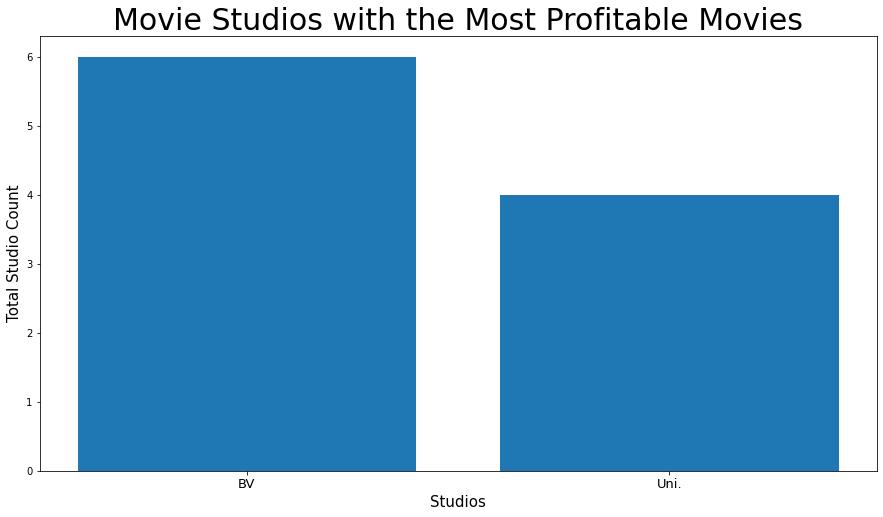

In [25]:
#Create bar chart showing the number of movie studios containing the top 10 most profitable movies
x = studio_count.index
y = studio_count.values

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x,y)

ax.set_title('Movie Studios with the Most Profitable Movies', fontsize=30)
ax.set_xlabel('Studios', fontsize=15)
ax.set_ylabel('Total Studio Count', fontsize=15)

ax.set_xticklabels(x.str.replace(' ', '\n'))
ax.tick_params(axis='x', labelsize=13)

### The data above lets us know which movie studios created the top 10 profitable movies. 'BV' stands for Buena Vista - which is associated with Walt Disney Studios. 'Uni.' stands for Universal Studios.

# 11. Find out which movie studios are making the most profit from the Top 10 Most Profitable Movies.

Now I want to know which studio accumulated the most profit from the top 10 profitable movies.

In [26]:
query

,tconst,title,genres,studio,year,production_budget,worldwide_gross,profit
987,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,2018,300000000.0,2.048134e+09,1.748134e+09
643,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,2015,215000000.0,1.648855e+09,1.433855e+09
644,tt2820852,Furious 7,"Action,Crime,Thriller",Uni.,2015,190000000.0,1.518723e+09,1.328723e+09
988,tt1825683,Black Panther,"Action,Adventure,Sci-Fi",BV,2018,200000000.0,1.348258e+09,1.148258e+09
989,tt4881806,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,2018,170000000.0,1.305773e+09,1.135773e+09
407,tt2294629,Frozen,"Adventure,Animation,Comedy",BV,2013,150000000.0,1.272470e+09,1.122470e+09
646,tt2293640,Minions,"Adventure,Animation,Comedy",Uni.,2015,74000000.0,1.160336e+09,1.086336e+09
645,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,2015,330600000.0,1.403014e+09,1.072414e+09
990,tt3606756,Incredibles 2,"Action,Adventure,Animation",BV,2018,200000000.0,1.242521e+09,1.042521e+09
408,tt1300854,Iron Man 3,"Action,Adventure,Sci-Fi",BV,2013,200000000.0,1.215392e+09,1.015392e+09


In [27]:
#Group the studios and find their total profit from the dataframe above
studio_profits = query.groupby('studio')['profit'].sum()
studio_profits

studio
BV      7.149189e+09
Uni.    4.984687e+09
Name: profit, dtype: float64

# 12. Generate a bar plot.

In the cell below, create a bar chart displaying the most profitable movie studios within the Top 10 Worldwide Profitable Movies.

Use `fig` and `ax` as your variables.

Your chart should have the following:
1. A figsize set to `(15,8)`
2. A title set to `Movie Studio Profits in the Top 10 Most Profitable Movies`
3. A ylabel set to `Total Studio Profit (in billions $)`
4. An xlabel set to `Studios`

In [28]:
studio_profits.index

Index(['BV', 'Uni.'], dtype='object', name='studio')

In [29]:
studio_profits.values

array([7.14918928e+09, 4.98468663e+09])

<ipython-input-30-4a4be5cec19e>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x.str.replace(' ', '\n'))


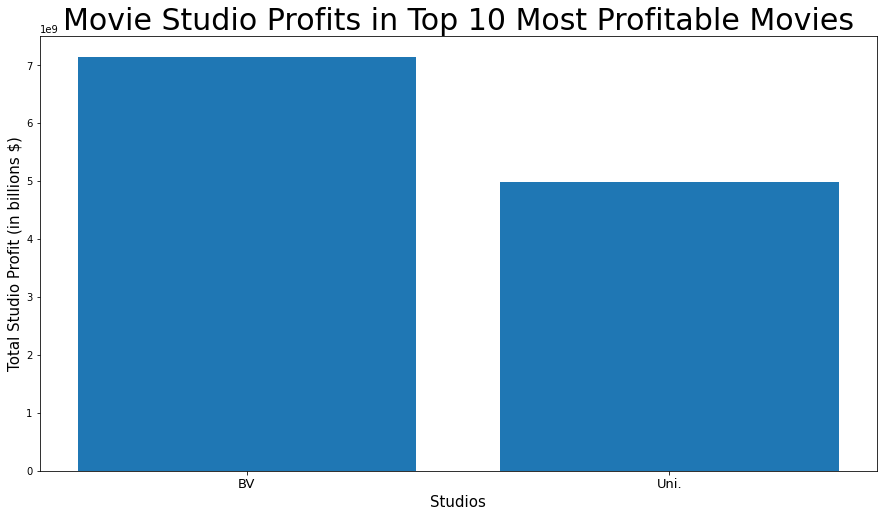

In [30]:
#Create bar chart showing the profits of movie studios that made the top 10 most profitable movies
x = studio_profits.index
y = studio_profits.values

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x,y)

ax.set_title('Movie Studio Profits in Top 10 Most Profitable Movies', fontsize=30)
ax.set_xlabel('Studios', fontsize=15)
ax.set_ylabel('Total Studio Profit (in billions $)', fontsize=15)

ax.set_xticklabels(x.str.replace(' ', '\n'))
ax.tick_params(axis='x', labelsize=13)

### The data above lets us know Buena Vista (Walt Disney Studios) is more profitable than Universal Studios. This tells us two things:
### 1. Buena Vista makes more profitable movies than any other movie studio.
### 2. Buena Vista makes a bigger profit than any other movie studio.

# 13. Create a new column called `new_genres` and then split each genre into its own row.

We're doing this because we want to count the number of times each genre appears for our top 10 profitable movies, and we want to know which genre is the most profitable in the top 10.

To do this, you will need to use the `genres` column and split each genre from each other.

In [31]:
query

,tconst,title,genres,studio,year,production_budget,worldwide_gross,profit
987,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,2018,300000000.0,2.048134e+09,1.748134e+09
643,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,2015,215000000.0,1.648855e+09,1.433855e+09
644,tt2820852,Furious 7,"Action,Crime,Thriller",Uni.,2015,190000000.0,1.518723e+09,1.328723e+09
988,tt1825683,Black Panther,"Action,Adventure,Sci-Fi",BV,2018,200000000.0,1.348258e+09,1.148258e+09
989,tt4881806,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,2018,170000000.0,1.305773e+09,1.135773e+09
407,tt2294629,Frozen,"Adventure,Animation,Comedy",BV,2013,150000000.0,1.272470e+09,1.122470e+09
646,tt2293640,Minions,"Adventure,Animation,Comedy",Uni.,2015,74000000.0,1.160336e+09,1.086336e+09
645,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,2015,330600000.0,1.403014e+09,1.072414e+09
990,tt3606756,Incredibles 2,"Action,Adventure,Animation",BV,2018,200000000.0,1.242521e+09,1.042521e+09
408,tt1300854,Iron Man 3,"Action,Adventure,Sci-Fi",BV,2013,200000000.0,1.215392e+09,1.015392e+09


In [32]:
query['new_genres'] = query['genres'].str.split(',',3)

In [33]:
query

,tconst,title,genres,studio,year,production_budget,worldwide_gross,profit,new_genres
987,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,2018,300000000.0,2.048134e+09,1.748134e+09,"[Action, Adventure, Sci-Fi]"
643,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,2015,215000000.0,1.648855e+09,1.433855e+09,"[Action, Adventure, Sci-Fi]"
644,tt2820852,Furious 7,"Action,Crime,Thriller",Uni.,2015,190000000.0,1.518723e+09,1.328723e+09,"[Action, Crime, Thriller]"
988,tt1825683,Black Panther,"Action,Adventure,Sci-Fi",BV,2018,200000000.0,1.348258e+09,1.148258e+09,"[Action, Adventure, Sci-Fi]"
989,tt4881806,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,2018,170000000.0,1.305773e+09,1.135773e+09,"[Action, Adventure, Sci-Fi]"
407,tt2294629,Frozen,"Adventure,Animation,Comedy",BV,2013,150000000.0,1.272470e+09,1.122470e+09,"[Adventure, Animation, Comedy]"
646,tt2293640,Minions,"Adventure,Animation,Comedy",Uni.,2015,74000000.0,1.160336e+09,1.086336e+09,"[Adventure, Animation, Comedy]"
645,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,2015,330600000.0,1.403014e+09,1.072414e+09,"[Action, Adventure, Sci-Fi]"
990,tt3606756,Incredibles 2,"Action,Adventure,Animation",BV,2018,200000000.0,1.242521e+09,1.042521e+09,"[Action, Adventure, Animation]"
408,tt1300854,Iron Man 3,"Action,Adventure,Sci-Fi",BV,2013,200000000.0,1.215392e+09,1.015392e+09,"[Action, Adventure, Sci-Fi]"


Next, update the dataframe using the `explode` function so that each genre under `new_genres` is listed in its own row.

In [34]:
query = query.explode('new_genres')

In [35]:
query

,tconst,title,genres,studio,year,production_budget,worldwide_gross,profit,new_genres
987,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,2018,300000000.0,2.048134e+09,1.748134e+09,Action
987,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,2018,300000000.0,2.048134e+09,1.748134e+09,Adventure
987,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,2018,300000000.0,2.048134e+09,1.748134e+09,Sci-Fi
643,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,2015,215000000.0,1.648855e+09,1.433855e+09,Action
643,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,2015,215000000.0,1.648855e+09,1.433855e+09,Adventure
643,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,2015,215000000.0,1.648855e+09,1.433855e+09,Sci-Fi
644,tt2820852,Furious 7,"Action,Crime,Thriller",Uni.,2015,190000000.0,1.518723e+09,1.328723e+09,Action
644,tt2820852,Furious 7,"Action,Crime,Thriller",Uni.,2015,190000000.0,1.518723e+09,1.328723e+09,Crime
644,tt2820852,Furious 7,"Action,Crime,Thriller",Uni.,2015,190000000.0,1.518723e+09,1.328723e+09,Thriller
988,tt1825683,Black Panther,"Action,Adventure,Sci-Fi",BV,2018,200000000.0,1.348258e+09,1.148258e+09,Action


# 14. Group and sort in descending order all the genres associated with the Top 10 Worldwide Profitable Movies.

You will use `new_genres` column to find this.

In [36]:
query_genres = query.groupby('new_genres')['profit'].count()
query_genres

new_genres
Action       8
Adventure    9
Animation    3
Comedy       2
Crime        1
Sci-Fi       6
Thriller     1
Name: profit, dtype: int64

In [37]:
genres_sorted = query_genres.sort_values(ascending=False)
genres_sorted

new_genres
Adventure    9
Action       8
Sci-Fi       6
Animation    3
Comedy       2
Thriller     1
Crime        1
Name: profit, dtype: int64

# 15. Generate a bar plot

In the cell below, create a sorted bar chart displaying the most popular genres within the Top 10 Worldwide Profitable Movies.

Use `fig` and `ax` as your variables.

Your chart should have the following:
1. A figsize set to `(15,8)`
2. A title set to `Most Popular Genres From Most Profitable Movies`
3. A ylabel set to `Total Genre Count`
4. An xlabel set to `Genres`

In [38]:
genres_sorted.index

Index(['Adventure', 'Action', 'Sci-Fi', 'Animation', 'Comedy', 'Thriller',
       'Crime'],
      dtype='object', name='new_genres')

In [39]:
genres_sorted.values

array([9, 8, 6, 3, 2, 1, 1], dtype=int64)

<ipython-input-40-5a3094562b83>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x.str.replace(',', '\n'))


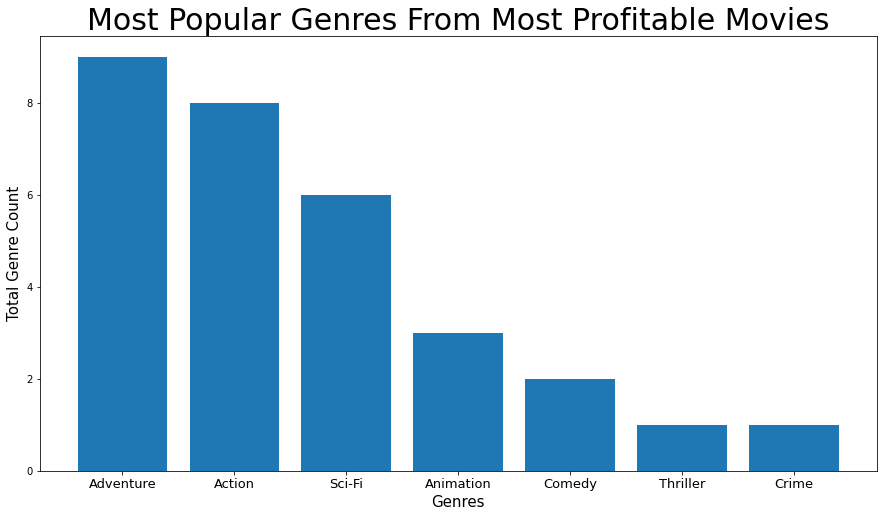

In [40]:
#Create bar chart showing the most popular genres from the top 10 most profitable movies
x = genres_sorted.index
y = genres_sorted.values

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x,y)

ax.set_title('Most Popular Genres From Most Profitable Movies', fontsize=30)
ax.set_xlabel('Genres', fontsize=15)
ax.set_ylabel('Total Genre Count', fontsize=15)

ax.set_xticklabels(x.str.replace(',', '\n'))
ax.tick_params(axis='x', labelsize=13)

### The data above lets us know how frequent each genre appears in our Top 10 Worldwide Profitable Movies bar chart. This is important because it lets us know which genre is most popular with audiences.

# 16. Find out which genre is making the most profit from the Top 10 Most Profitable Movies.

Once again, you will use the `new_genres` column to do this.

In [41]:
query

,tconst,title,genres,studio,year,production_budget,worldwide_gross,profit,new_genres
987,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,2018,300000000.0,2.048134e+09,1.748134e+09,Action
987,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,2018,300000000.0,2.048134e+09,1.748134e+09,Adventure
987,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,2018,300000000.0,2.048134e+09,1.748134e+09,Sci-Fi
643,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,2015,215000000.0,1.648855e+09,1.433855e+09,Action
643,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,2015,215000000.0,1.648855e+09,1.433855e+09,Adventure
643,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,2015,215000000.0,1.648855e+09,1.433855e+09,Sci-Fi
644,tt2820852,Furious 7,"Action,Crime,Thriller",Uni.,2015,190000000.0,1.518723e+09,1.328723e+09,Action
644,tt2820852,Furious 7,"Action,Crime,Thriller",Uni.,2015,190000000.0,1.518723e+09,1.328723e+09,Crime
644,tt2820852,Furious 7,"Action,Crime,Thriller",Uni.,2015,190000000.0,1.518723e+09,1.328723e+09,Thriller
988,tt1825683,Black Panther,"Action,Adventure,Sci-Fi",BV,2018,200000000.0,1.348258e+09,1.148258e+09,Action


In [42]:
genre_profits =query.groupby('new_genres')['profit'].sum()
genre_profits

new_genres
Action       9.925070e+09
Adventure    1.080515e+10
Animation    3.251327e+09
Comedy       2.208806e+09
Crime        1.328723e+09
Sci-Fi       7.553826e+09
Thriller     1.328723e+09
Name: profit, dtype: float64

In [43]:
genre_profits_sorted = genre_profits.sort_values(ascending=False)
genre_profits_sorted

new_genres
Adventure    1.080515e+10
Action       9.925070e+09
Sci-Fi       7.553826e+09
Animation    3.251327e+09
Comedy       2.208806e+09
Thriller     1.328723e+09
Crime        1.328723e+09
Name: profit, dtype: float64

# 17. Generate a bar plot

In the cell below, create a sorted bar chart displaying the most profitable genres within the Top 10 Worldwide Profitable Movies.

Use `fig` and `ax` as your variables.

Your chart should have the following:
1. A figsize set to `(15,8)`
2. A title set to `Most Profitable Genres`
3. A ylabel set to `Profit(in billions $)`
4. An xlabel set to `Genres`

In [44]:
genre_profits_sorted.index

Index(['Adventure', 'Action', 'Sci-Fi', 'Animation', 'Comedy', 'Thriller',
       'Crime'],
      dtype='object', name='new_genres')

In [45]:
genre_profits_sorted.values

array([1.08051531e+10, 9.92506983e+09, 7.55382632e+09, 3.25132679e+09,
       2.20880608e+09, 1.32872279e+09, 1.32872279e+09])

<ipython-input-46-1368149a0d9d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x.str.replace(',', '\n'))


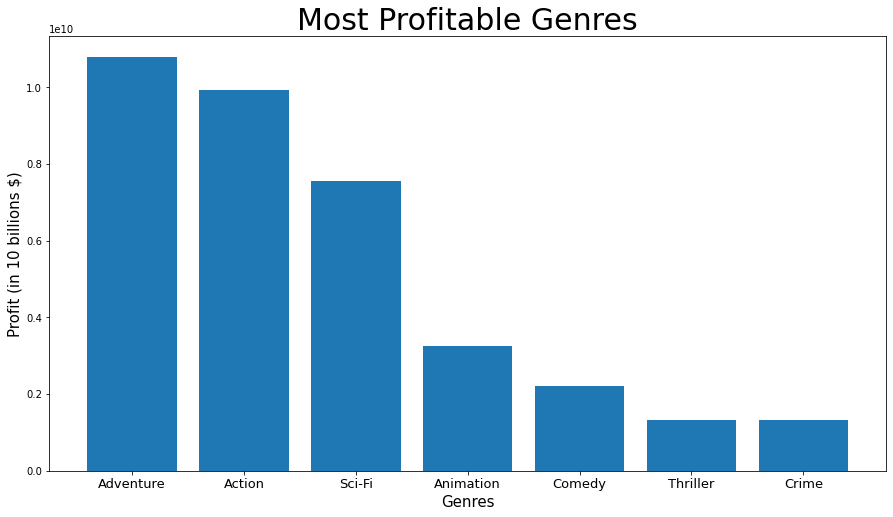

In [46]:
#Create bar chart showing the most profitable genres from the top 10 most profitable movies
x = genre_profits_sorted.index
y = genre_profits_sorted.values

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x,y)

ax.set_title('Most Profitable Genres', fontsize=30)
ax.set_xlabel('Genres', fontsize=15)
ax.set_ylabel('Profit (in 10 billions $)', fontsize=15)

ax.set_xticklabels(x.str.replace(',', '\n'))
ax.tick_params(axis='x', labelsize=13)

### The data above tells us how profitable each genre is under the Top 10 Worldwide Profitable Movies bar chart. This is important because it tells us which genres have the best chance at making a profit for movie studios.